<a href="https://colab.research.google.com/github/qonitaa12/ParkingDetection/blob/main/Parking_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clone YOLOv5 Repository dan Pindah Direktori**


In [ ]:
# Clone YOLOv5 dari repo resmi
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 17483 (delta 79), reused 30 (delta 30), pack-reused 17374 (from 4)
Receiving objects: 100% (17483/17483), 16.39 MiB | 29.80 MiB/s, done.
Resolving deltas: 100% (11984/11984), done.
/content/yolov5


# **Install Dependencies YOLOv5 dan Roboflow**

In [ ]:
# Install semua dependensi YOLOv5
!pip install -r requirements.txt

# Install Roboflow SDK
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

# **Download Dataset dari Roboflow**

In [ ]:
from roboflow import Roboflow

# Inisialisasi API Roboflow
rf = Roboflow(api_key="S4xMwV6xej7eyEhacdsA")
project = rf.workspace("qonita-milla-hanifa-q9wvi").project("parking-spot-detector-a84ql-fbytb")
version = project.version(1)

# Download dataset dalam format YOLOv5
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to parking-spot-detector-1 in yolov5pytorch:: 100%|██████████| 1212/1212 [00:00<00:00, 2769.51it/s]


# **Lihat Kelas / Label yang Ada dalam Dataset**

In [ ]:
import yaml

# Baca data.yaml untuk melihat label
with open(f"{dataset.location}/data.yaml", 'r') as f:
    data_yaml = yaml.safe_load(f)

print("Classes:", data_yaml['names'])


Classes: ['empty', 'occupied']


# **Training Model YOLOv5**

In [ ]:
# Training model YOLOv5
!python train.py --img 416 --batch 16 --epochs 30 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-25 05:53:41.844527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748152422.092621    2336 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748152422.157105    2336 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

# **Evaluasi Model: Melihat Hasil Akurasi Training**

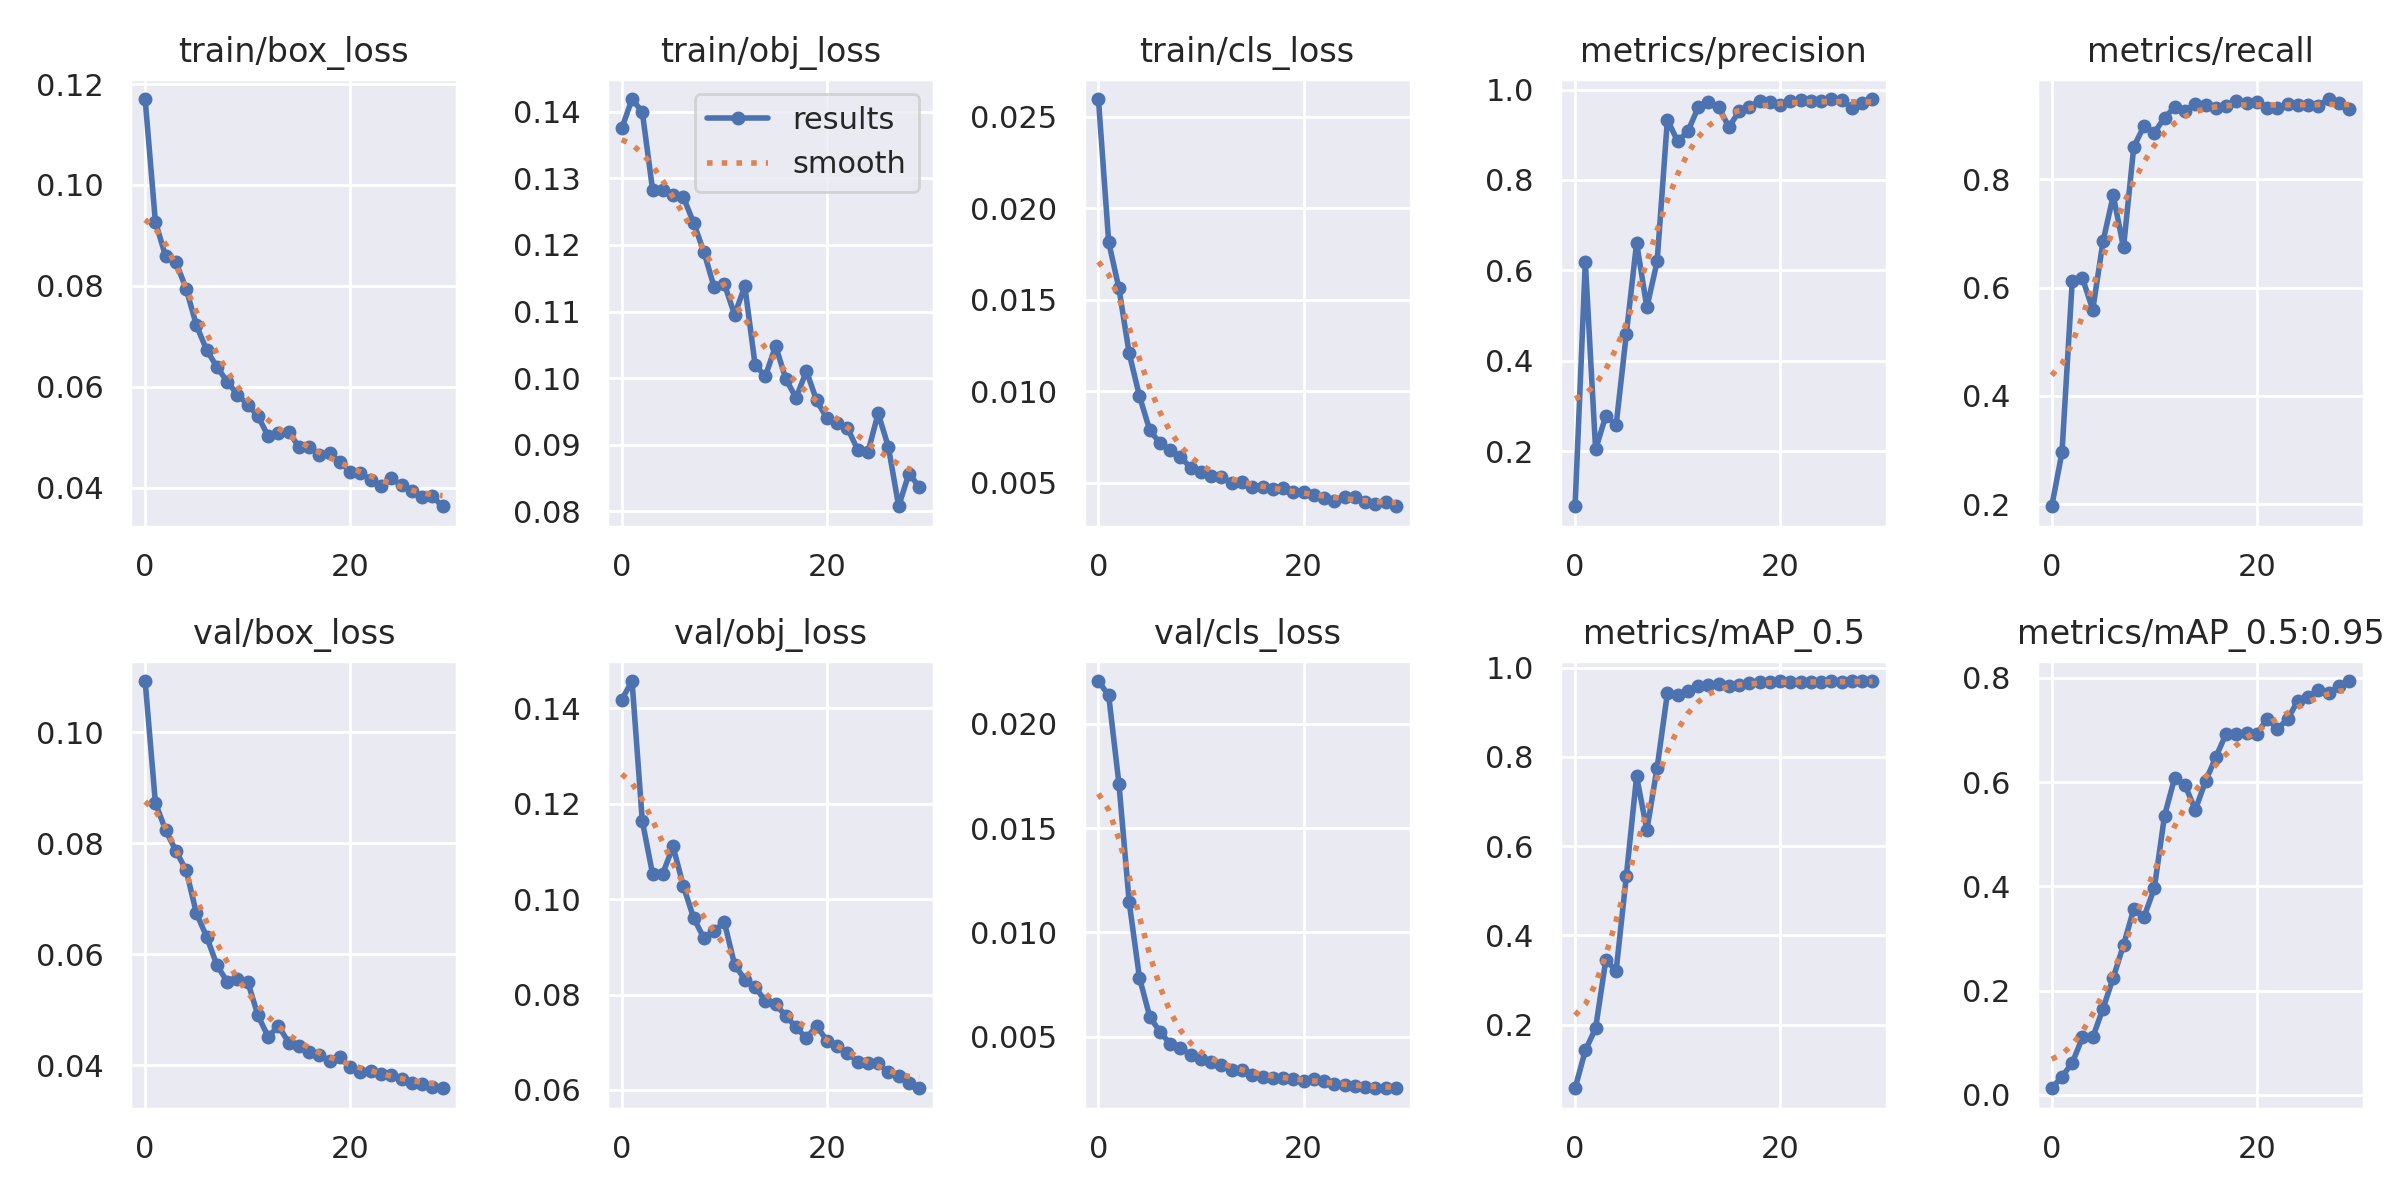

In [ ]:
 # Melihat hasil training (grafik precision, recall, mAP)
from IPython.display import Image
Image(filename='runs/train/exp/results.png', width=700)

# **Deteksi Slot Parkir**

In [ ]:
# Jalankan deteksi pada folder test (jika ingin lihat hasil)
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --source {dataset.location}/test/images --conf 0.25

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/parking-spot-detector-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/21 /content/yolov5/parking-spot-detector-1/test/images/2022-11-15-14-09-20_mp4-38_jpg.rf.90dd347d9155e0bae08e694e4ebedefe.jpg: 256x416 6 emptys, 3 occupieds, 27.6ms
image 2/21 /content/yolov5/parking-spot-detector-1/test/images/2022-11-15-14-11-26_mp4-37_jpg.rf.d93099b1daf5

# **Cek hasil deteksi gambar**

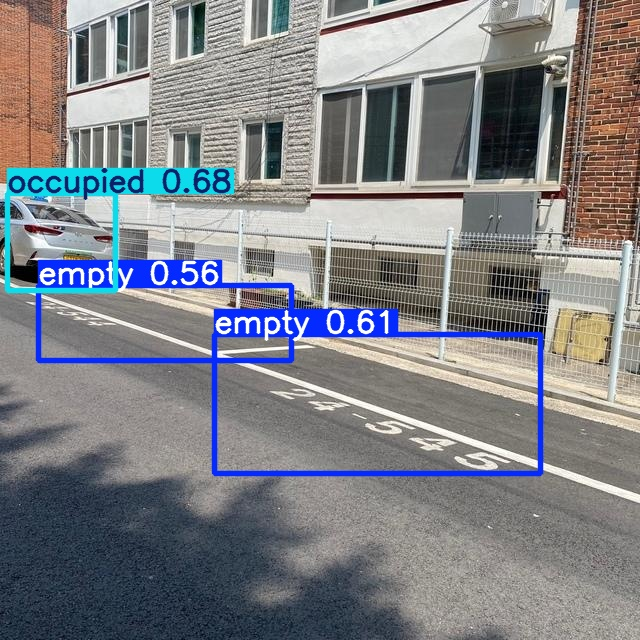

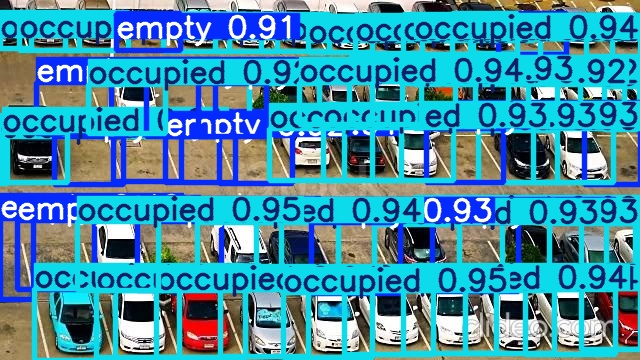

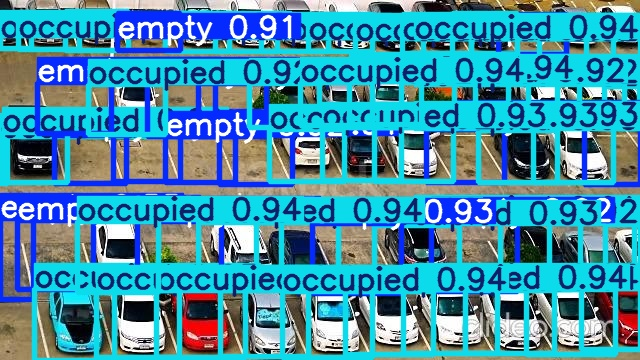

In [ ]:
from IPython.display import Image, display
import glob

# Tampilkan beberapa hasil deteksi dari folder runs/detect/exp
detected_images = glob.glob('runs/detect/exp/*.jpg')

for img_path in detected_images[:3]:  # tampilkan 3 gambar pertama
    display(Image(filename=img_path, width=600))